<h1><center>Linear Regression</center></h1>
<p>Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.</p>

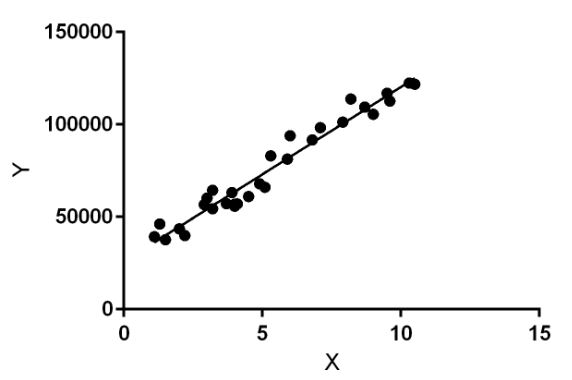

<p>Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.
In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.</p>
<h2> <u>Hypothesis function for Linear Regression :</h2>

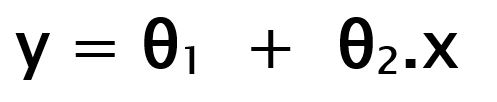

<p>Once we find the best θ1 and θ2 values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.</p>
<p><h3>How to update θ1 and θ2 values to get the best fit line ?

Cost Function (J):</h3>
By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y).</p>

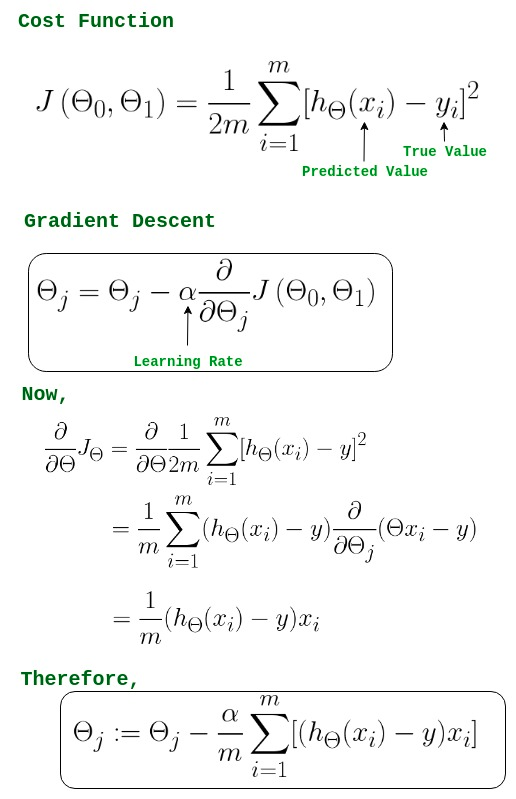

-> θj     : Weights of the hypothesis.<br>
-> hθ(xi) : predicted y value for ith input.<br>
-> j     : Feature index number (can be 0, 1, 2, ......, n).<br>
-> α     : Learning Rate of Gradient Descent.

<h2> Implementation of Linear Regression using Gradient Descent Approach</h2>

In [ ]:
#Importing Necessary Libraries for computations
import numpy as np #for vector calc
import matplotlib.pyplot as plt #visualizations
 
 #creating class which has all the necessary methods to fit linear regression to a dataset
class LinearRegression:

    #constructor function which initialises the X Y and coefficientes of Linear Regression initally as 0
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]

    #Implemented Gradient Descent Technique to update the bo b1 till it reaches the best fit line conditions   
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                np.sum(Y_pred - Y)))
 
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                np.sum((Y_pred - Y) * self.X)))
 
    #for the current b0 b1 values it tries to fit the x values and find corresponding y predicted values
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
 
        return Y_pred
    
    #returns the accuracy of the model
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
 
    #Computing the cost function for each predicted vs actual Y data
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
        
    #plots the regressive plot
    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()
 

100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


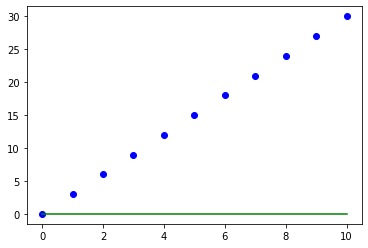

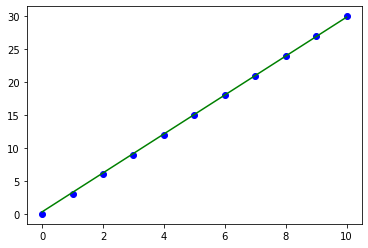

In [ ]:
def main():
    X = np.array([i for i in range(11)])
    Y = np.array([3*i for i in range(11)])
 
    regressor = LinearRegression(X, Y)
 
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
     
    #original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
     
 
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)
         
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",regressor.get_current_accuracy(Y_pred))
 
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
 
    #final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')
 
    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])
 
if __name__ == '__main__':
    main()

<h2> Lasso Regression or L1 Regularisation </h2>

<p>Linear Regression model considers all the features equally relevant for prediction. When there are many features in the dataset and even some of them are not relevant for the predictive model. This makes the model more complex with a too inaccurate prediction on the test set ( or overfitting ). Such a model with high variance does not generalize on the new data. So, Lasso Regression comes for the rescue. It introduced an L1 penalty ( or equal to the absolute value of the magnitude of weights) in the cost function of Linear Regression. The modified cost function for Lasso Regression is given below.
</p>

image.png

Here, w(j) represents the weight for jth feature.<br>  
n is the number of features in the dataset.<br>
lambda is the regularization strength.

Different cases for tuning values of lambda.<br>
<ul>
<li>If lambda is set to be 0,   Lasso Regression equals Linear Regression.<br>
</li><li>If lambda is set to be infinity, all weights are shrunk to zero.<br>
</li>If we increase lambda, bias increases if we decrease the lambda variance increase. As lambda increases, more and more weights are shrunk to zero and eliminates features from the mode

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Predicted values  [ 40600.91 123294.39  65033.07]
Real values       [ 37731. 122391.  57081.]
Trained W         9396.99
Trained b         26505.43


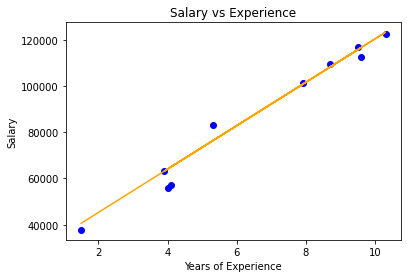

In [ ]:
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b
      
  
def main() :
      
    # Importing dataset
      
    df = pd.read_csv( "https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv" )
  
    X = df.iloc[:, :-1].values
  
    Y = df.iloc[:, 1].values
      
    # Splitting dataset into train and test set
  
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1 / 3, random_state = 0 )
      
    # Model training
      
    model = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
  
    model.fit( X_train, Y_train )
      
    # Prediction on test set
  
    Y_pred = model.predict( X_test )
      
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
      
    print( "Real values      ", Y_test[:3] )
      
    print( "Trained W        ", round( model.W[0], 2 ) )
      
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set 
      
    plt.scatter( X_test, Y_test, color = 'blue' )
      
    plt.plot( X_test, Y_pred, color = 'orange' )
      
    plt.title( 'Salary vs Experience' )
      
    plt.xlabel( 'Years of Experience' )
      
    plt.ylabel( 'Salary' )
      
    plt.show()
      
  
if __name__ == "__main__" : 
      
    main()

<h2>Ridge Regression or L2 Regularisation</h2>

In short, Linear Regression is a model with high variance. So, Ridge Regression comes for the rescue. In Ridge Regression, there is an addition of l2 penalty ( square of the magnitude of weights ) in the cost function of Linear Regression. This is done so that the model does not overfit the data. The Modified cost function for Ridge Regression is given below:



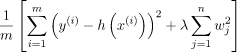

Here, wj represents the weight for jth feature.<BR>
n is the number of features in the dataset.

Different cases for tuning values of lambda.<BR>
<UL>
<LI>If lambda is set to be 0, Ridge Regression equals Linear Regression<BR>
<LI>If lambda is set to be infinity, all weights are shrunk to zero.<BR>
So, we should set lambda somewhere in between 0 and infinity.

Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731. 122391.  57081.]
Trained W         9325.76
Trained b         26842.8


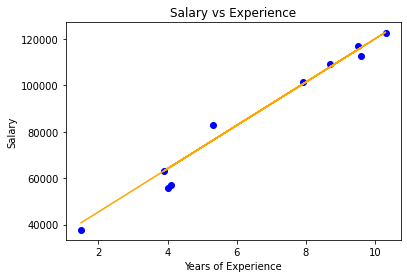

In [ ]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv" )
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values    
  
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
                                          test_size = 1 / 3, random_state = 0 )
      
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, Y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
    print( "Real values      ", Y_test[:3] )    
    print( "Trained W        ", round( model.W[0], 2 ) )    
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set     
    plt.scatter( X_test, Y_test, color = 'blue' )    
    plt.plot( X_test, Y_pred, color = 'orange' )    
    plt.title( 'Salary vs Experience' )    
    plt.xlabel( 'Years of Experience' )    
    plt.ylabel( 'Salary' )    
    plt.show()
      
if __name__ == "__main__" : 
    main()

<H2> Elastic Net Regression </h2>

Linear Regression suffers from overfitting and can’t deal with collinear data. When there are many features in the dataset and even some of them are not relevant for the predictive model. This makes the model more complex with a too inaccurate prediction on the test set (or overfitting). Such a model with high variance does not generalize on the new data. So, to deal with these issues, we include both L-2 and L-1 norm regularization to get the benefits of both Ridge and Lasso at the same time. The resultant model has better predictive power than Lasso. It performs feature selection and also makes the hypothesis simpler. The modified cost function for Elastic-Net Regression is given below :

image.png

Here, w(j) represents the weight for jth feature.  <br>
n is the number of features in the dataset.<br>
lambda1 is the regularization strength for L-1 norm.<br>
lambda2 is the regularization strength for L-2 norm.

Different cases for tuning values of lambda1 and lamda2. <br>
<ul>
<li>If lambda1 and lambda2 are set to be 0, Elastic-Net Regression equals Linear Regression.
<li>If lambda1 is set to be 0, Elastic-Net Regression equals Ridge Regression.
<li>If lambda2 is set to be 0, Elastic-Net Regression equals Lasso Regression.
<li>If lambda1 and lambda2 are set to be infinity, all weights are shrunk to zero
So, we should set lambda1 and lambda2 somewhere in between 0 and infinity.

Predicted values  [ 40837.61 122887.43  65079.6 ]
Real values       [ 37731. 122391.  57081.]
Trained W         9323.84
Trained b         26851.84


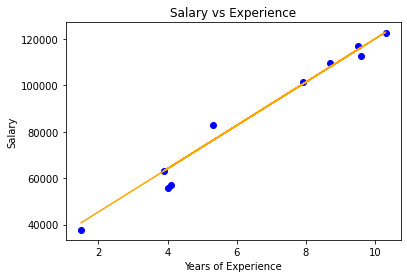

In [ ]:
class ElasticRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality, l2_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
        self.l2_penality = l2_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) + 
                           
                         self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b
          
# Driver Code
  
def main() :
      
    # Importing dataset
      
    df = pd.read_csv( "https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv" )
  
    X = df.iloc[:,:-1].values
  
    Y = df.iloc[:,1].values
      
    # Splitting dataset into train and test set
  
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                                          
                                             test_size = 1/3, random_state = 0 )
      
    # Model training
      
    model = ElasticRegression( iterations = 1000, 
                                
                      learning_rate = 0.01, l1_penality = 500, l2_penality = 1 )
  
    model.fit( X_train, Y_train )
      
    # Prediction on test set
  
    Y_pred = model.predict( X_test )
      
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
      
    print( "Real values      ", Y_test[:3] )
      
    print( "Trained W        ", round( model.W[0], 2 ) )
      
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set 
      
    plt.scatter( X_test, Y_test, color = 'blue' )
      
    plt.plot( X_test, Y_pred, color = 'orange' )
      
    plt.title( 'Salary vs Experience' )
      
    plt.xlabel( 'Years of Experience' )
      
    plt.ylabel( 'Salary' )
      
    plt.show()
        
  
if __name__ == "__main__" : 
      
    main()